In [1]:
# Bibliotecas utilizadas:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px
from string import ascii_uppercase

In [2]:
# Configurando o Pandas:

pd.set_option('display.max.rows', None)
pd.set_option('display.max.columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
# Converter o CSV em PARQUET (arquivo mais otimizado):

df_enem_csv = pd.read_csv('C:\DataScience\Dados\microdados_enem_2020\DADOS\MICRODADOS_ENEM_2020.csv', encoding='latin1', sep=';')
df_enem_csv.to_parquet('C:\DataScience\Dados\microdados_enem_2020\DADOS\MICRODADOS_ENEM_2020.parquet')

In [4]:
# Lendo o arquivo Parquet no df_enem:

df_enem = pd.read_parquet('C:\DataScience\Dados\microdados_enem_2020\DADOS\MICRODADOS_ENEM_2020.parquet')
df_enem.shape

(5783109, 76)

In [5]:
# Salvar os parquet com 10% dos dados:

df_enem.to_parquet('C:\DataScience\Dados\microdados_enem_2020\DADOS\MICRODADOS_ENEM_2020.parquet')

In [6]:
df_enem = pd.read_parquet('C:\DataScience\Dados\microdados_enem_2020\DADOS\MICRODADOS_ENEM_2020.parquet')

In [7]:
len(df_enem['NU_INSCRICAO'].unique())

5783109

In [8]:
df_enem.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,200006271946,2020,11,F,1,2,1,1,11,1,NaN,0,NaN,None,NaN,None,NaN,NaN,NaN,1501402,Belém,15,PA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,1,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,200001195856,2020,11,M,2,3,1,1,11,1,NaN,0,NaN,None,NaN,None,NaN,NaN,NaN,2408102,Natal,24,RN,1,1,1,1,702.00,689.00,693.00,698.00,604.10,661.70,595.30,711.30,BCBDBDCCCDBDDBADEEACEEAECBECCDBCACDEBEECEBAAE,BCAECABCDCEBDBBBDAABABACBCDDDBDDBABDAADACACBC,99999CADDEDADBAABEAADAAAADCADAABDCCBEECAEECAAC...,EBEBDEDAECBADCADDABACAEDBEEEAEADCCBCEACDACEBB,1,ABBACBCCCDDDDBAEEBECEDACABDCBEDAECDABECCBBADE,BCEECDBCCDEBDBBBBEAAAEACBCDDDBDDBABDABDDBAABC,99999CBDDEDBDBACECABAAAEAECCDCABCBBBBEEDCECAAE...,BBEADECAECBBXCEBADBACAEDACEDADAADCBCCBBDABBEE,1.00,120.00,120.00,120.00,120.00,100.00,580.00,None,None,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,200001943954,2020,4,F,2,3,2,2,0,2,1.00,0,2927408.00,Salvador,29.00,BA,2.00,1.00,1.00,2927408,Salvador,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,0,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,A,D,3.00,B,A,B,A,A,A,B,A,B,A,B,A,A,B,A,A,A,A,A,A
3,200001908998,2020,2,M,1,3,1,2,0,2,1.00,0,3547304.00,Santana de Parnaíba,35.00,SP,3.00,1.00,1.00,3547304,Santana de Parnaíba,35,SP,1,1,1,1,700.00,688.00,692.00,696.00,620.80,675.00,624.20,759.40,EBEDCCCDCBDBAECAECCECEACCBAABBBCEABCAAAEBEBAE,DABCCACCBCCDCADBDCBAAEBDDBAABDBAEBEBBABDABDBE,DCEAB99999AADAECCEBCDDDCBABDDABBCEEBAEDDDADEBE...,CBDBDCCDDEECBAABBBADEDEDBECDEBBADAEBAABBECBBA,0,BDECCACBEBDEAEDAECCBAEABCCEADDBBCADCBDDEBDBAC,DABCCAECBABECADBDCCABDBCDDAABDBAEBEBBDBDDBDBE,DCEAD99999AADACCCCBBDDCABAECAABBEECBAEDDBBEEBE...,EBDBXCCDAEECBAABABAEDDEDAECBCDCADEEBBABBACBCA,1.00,140.00,200.00,140.00,120.00,160.00,760.00,None,None,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,200001634757,2020,4,F,1,3,2,1,1,1,NaN,0,NaN,None,NaN,None,NaN,NaN,NaN,3121605,Diamantina,31,MG,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,1,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,G,B,B,3.00,B,A,B,D,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B


In [9]:
# Selecionando as colunas com TX_ (Taxa):

lista_coluna_com_tx = list()

for colunas in df_enem:
    if 'TX' in colunas:
        lista_coluna_com_tx.append(colunas)

lista_coluna_com_tx

['TX_RESPOSTAS_CN',
 'TX_RESPOSTAS_CH',
 'TX_RESPOSTAS_LC',
 'TX_RESPOSTAS_MT',
 'TX_GABARITO_CN',
 'TX_GABARITO_CH',
 'TX_GABARITO_LC',
 'TX_GABARITO_MT']

In [10]:
# Selecionando as colunas que serão removidas:

colunas_questoes = [coluna for coluna in df_enem.columns if coluna.startswith('TX_')]
colunas_questoes

['TX_RESPOSTAS_CN',
 'TX_RESPOSTAS_CH',
 'TX_RESPOSTAS_LC',
 'TX_RESPOSTAS_MT',
 'TX_GABARITO_CN',
 'TX_GABARITO_CH',
 'TX_GABARITO_LC',
 'TX_GABARITO_MT']

In [11]:
# Selecionando as colunas que serão removidas:

colunas_codigos = [coluna for coluna in df_enem.columns if coluna.startswith('CO_')]
colunas_codigos

['CO_MUNICIPIO_ESC',
 'CO_UF_ESC',
 'CO_MUNICIPIO_PROVA',
 'CO_UF_PROVA',
 'CO_PROVA_CN',
 'CO_PROVA_CH',
 'CO_PROVA_LC',
 'CO_PROVA_MT']

In [12]:
# Selecionando as colunas que serão removidas:

coluna_municipios = [coluna for coluna in df_enem.columns if 'MUNICIPIO' in coluna]
coluna_municipios

['CO_MUNICIPIO_ESC',
 'NO_MUNICIPIO_ESC',
 'CO_MUNICIPIO_PROVA',
 'NO_MUNICIPIO_PROVA']

In [13]:
# Removendo as colunas de questões, códigos, municípios, números do ano e inscrição selecionados anteriormente:

colunas_remover = colunas_questoes + colunas_codigos + coluna_municipios + ['NU_ANO','NU_INSCRICAO']
df_enem = df_enem.drop(colunas_remover, axis=1)
df_enem.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,11,F,1,2,1,1,11,1,NaN,0,None,NaN,NaN,NaN,PA,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,11,M,2,3,1,1,11,1,NaN,0,None,NaN,NaN,NaN,RN,1,1,1,1,604.10,661.70,595.30,711.30,1,1.00,120.00,120.00,120.00,120.00,100.00,580.00,None,None,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,4,F,2,3,2,2,0,2,1.00,0,BA,2.00,1.00,1.00,BA,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,A,D,3.00,B,A,B,A,A,A,B,A,B,A,B,A,A,B,A,A,A,A,A,A
3,2,M,1,3,1,2,0,2,1.00,0,SP,3.00,1.00,1.00,SP,1,1,1,1,620.80,675.00,624.20,759.40,0,1.00,140.00,200.00,140.00,120.00,160.00,760.00,None,None,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,4,F,1,3,2,1,1,1,NaN,0,None,NaN,NaN,NaN,MG,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,G,B,B,3.00,B,A,B,D,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B


In [14]:
# Realizando a leitura dos dados novos:

df_enem.shape


(5783109, 56)

In [15]:
# Visualizando todos os dados estatísticos necessarios:

df_enem.describe()

,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,5783109.00,5783109.00,5783109.00,5783109.00,5783109.00,5783109.00,5783109.00,1303446.00,5783109.00,904569.00,904569.00,904569.00,5783109.00,5783109.00,5783109.00,5783109.00,2597440.00,2754140.00,2754140.00,2597440.00,5783109.00,2754140.00,2754140.00,2754140.00,2754140.00,2754140.00,2754140.00,2754140.00,5687143.00
mean,6.40,1.10,2.15,1.03,1.45,3.32,1.28,1.01,0.10,2.44,1.03,1.01,0.45,0.48,0.48,0.45,490.41,511.15,523.80,520.58,0.54,1.11,119.73,121.89,110.34,123.49,97.96,573.41,3.71
std,4.17,0.48,1.01,0.21,0.69,4.54,0.52,0.08,0.30,0.91,0.18,0.18,0.50,0.50,0.50,0.50,80.00,96.22,74.55,117.31,0.50,0.73,33.30,50.66,44.47,38.31,58.87,199.82,1.47
min,1.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,3.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,2.00,1.00,1.00,0.00,0.00,0.00,0.00,427.00,435.30,478.00,425.80,0.00,1.00,100.00,120.00,80.00,100.00,40.00,460.00,3.00
50%,5.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00,0.00,2.00,1.00,1.00,0.00,0.00,0.00,0.00,483.70,512.50,529.90,505.10,1.00,1.00,120.00,120.00,120.00,120.00,100.00,580.00,4.00
75%,11.00,1.00,3.00,1.00,2.00,5.00,1.00,1.00,0.00,3.00,1.00,1.00,1.00,1.00,1.00,1.00,548.70,580.60,576.40,602.30,1.00,1.00,140.00,160.00,140.00,140.00,140.00,700.00,4.00
max,20.00,4.00,5.00,4.00,4.00,14.00,3.00,2.00,1.00,4.00,2.00,4.00,2.00,2.00,2.00,2.00,854.80,862.60,801.10,975.00,1.00,9.00,200.00,200.00,200.00,200.00,200.00,1000.00,20.00


In [16]:
# Separando as colunas que obtem as notas:

coluna_notas = [coluna for coluna in df_enem if 'NOTA' in coluna]
coluna_notas

['NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_MT',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO']

In [17]:
# Selecionando somente as notas importantes para analise desejadas:

coluna_notas = [coluna for coluna in coluna_notas if 'COMP' not in coluna]
coluna_notas

['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

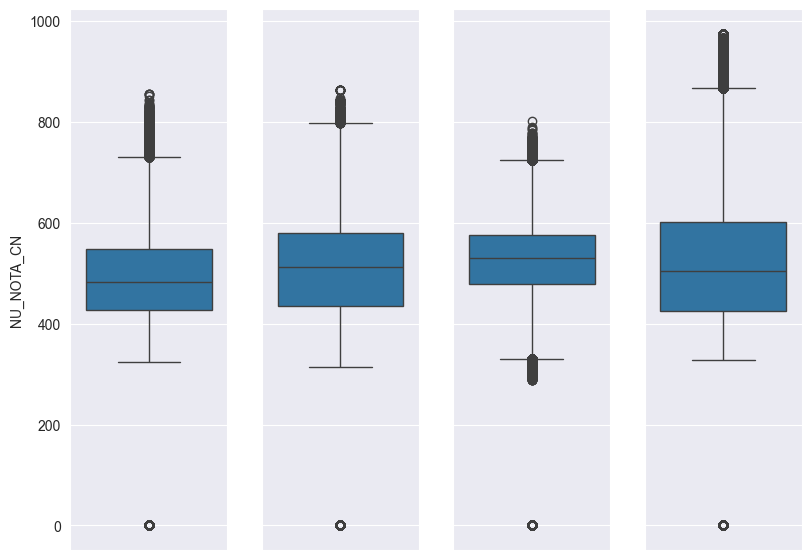

In [18]:
# Analisando os dados das notas com boxplot:

sns.set_style("darkgrid")
figura, graficos = plt.subplots(1, 4, sharey=True, figsize=(8,6))
plt.tight_layout()

for i in range(4):
    coluna_1 = coluna_notas[i]
    sns.boxplot(data=df_enem, y=coluna_1, ax=graficos[i])

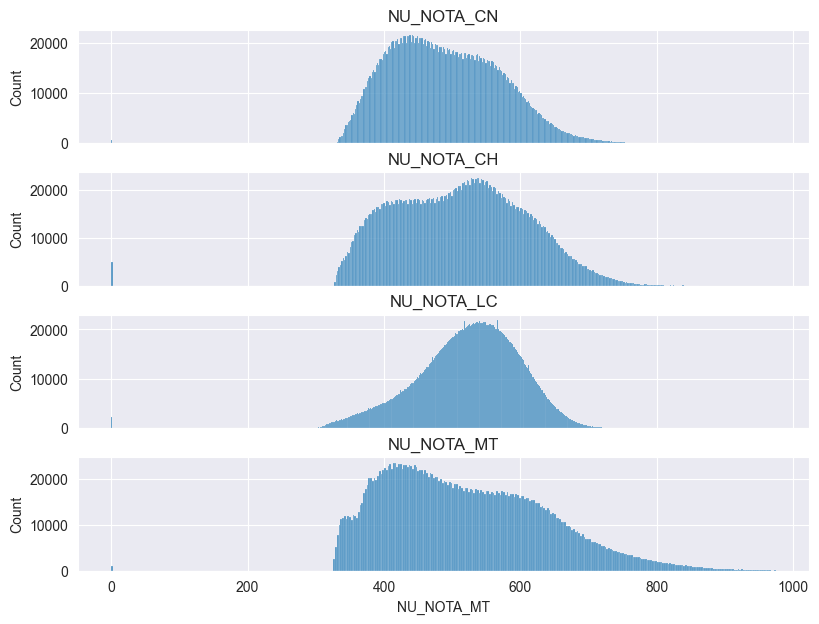

In [19]:
# Analisando os dados das notas com o histograma:

sns.set_style("darkgrid")
figura, graficos = plt.subplots(4, 1, sharex=True, figsize=(8,6))
plt.tight_layout()

for i in range(4):
    coluna_1 = coluna_notas[i]
    sns.histplot(data=df_enem[coluna_1], ax=graficos[i]).set_title(coluna_1)

Text(0.5, 1.0, 'NU_NOTA_REDACAO')

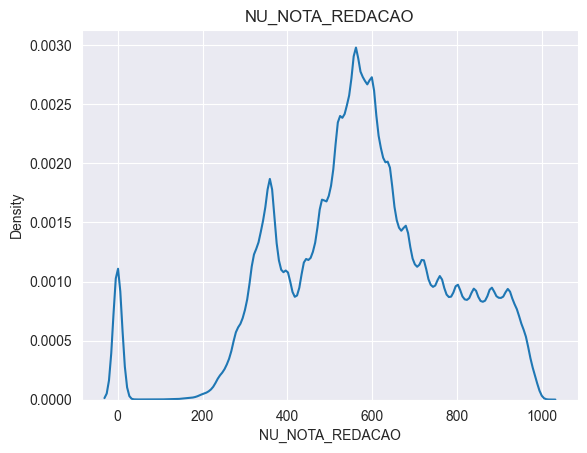

In [20]:
# Analisando os dados das notas de redação com o density:

sns.kdeplot(data=df_enem['NU_NOTA_REDACAO']).set_title('NU_NOTA_REDACAO')

In [21]:
# ANÁLISE INFORMAÇÕES DEMOGRÁFICAS

# Reiniciar os índices:

df_enem = df_enem.reset_index(drop=True)
df_enem.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,11,F,1,2,1,1,11,1,NaN,0,None,NaN,NaN,NaN,PA,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,11,M,2,3,1,1,11,1,NaN,0,None,NaN,NaN,NaN,RN,1,1,1,1,604.10,661.70,595.30,711.30,1,1.00,120.00,120.00,120.00,120.00,100.00,580.00,None,None,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,4,F,2,3,2,2,0,2,1.00,0,BA,2.00,1.00,1.00,BA,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,A,D,3.00,B,A,B,A,A,A,B,A,B,A,B,A,A,B,A,A,A,A,A,A
3,2,M,1,3,1,2,0,2,1.00,0,SP,3.00,1.00,1.00,SP,1,1,1,1,620.80,675.00,624.20,759.40,0,1.00,140.00,200.00,140.00,120.00,160.00,760.00,None,None,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,4,F,1,3,2,1,1,1,NaN,0,None,NaN,NaN,NaN,MG,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,G,B,B,3.00,B,A,B,D,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B


In [22]:
# Realizando a contagem dos números da coluna do faixa etária:

df_enem['TP_FAIXA_ETARIA'].value_counts().sort_index()

TP_FAIXA_ETARIA
1     336805
2     775404
3     887715
4     609450
5     459606
6     353734
7     274709
8     239812
9     204689
10    177344
11    575442
12    341808
13    235027
14    143795
15     86079
16     47539
17     22383
18      8144
19      2693
20       931
Name: count, dtype: int64

<Axes: xlabel='TP_FAIXA_ETARIA', ylabel='count'>

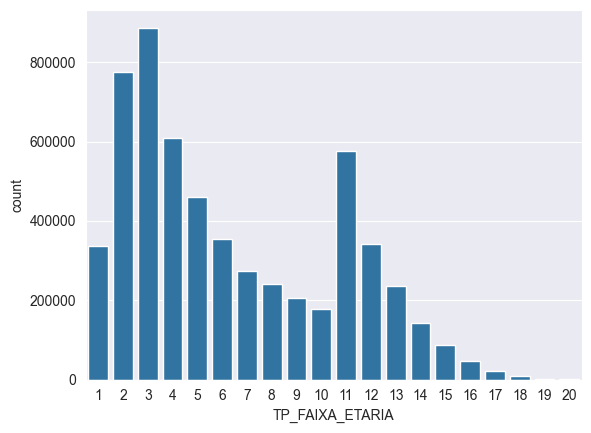

In [23]:
# Gráfico de contagem da faixa etária das idades:

sns.countplot(data=df_enem, x='TP_FAIXA_ETARIA')

In [24]:

# A coluna do faixa etária em porcentagem:

df_enem['TP_FAIXA_ETARIA'].value_counts(normalize=True) * 100

TP_FAIXA_ETARIA
3    15.35
2    13.41
4    10.54
11    9.95
5     7.95
6     6.12
12    5.91
1     5.82
7     4.75
8     4.15
13    4.06
9     3.54
10    3.07
14    2.49
15    1.49
16    0.82
17    0.39
18    0.14
19    0.05
20    0.02
Name: proportion, dtype: float64

In [25]:
# Realizando a contagem dos números da coluna do sexo:

df_enem['TP_SEXO'].value_counts()

TP_SEXO
F    3468805
M    2314304
Name: count, dtype: int64

In [26]:
# A coluna do sexo em porcentagem:

df_enem['TP_SEXO'].value_counts(normalize=True) * 100

TP_SEXO
F   59.98
M   40.02
Name: proportion, dtype: float64

<Axes: xlabel='TP_SEXO', ylabel='count'>

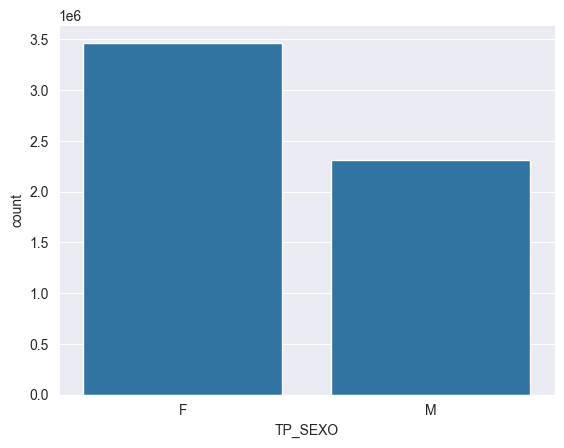

In [27]:

# Gráfico de contagem do sexo dos canditados:

sns.countplot(data=df_enem, x='TP_SEXO')

In [28]:
# Realizando a contagem dos números da coluna do estado civil:

df_enem['TP_ESTADO_CIVIL'].value_counts().sort_index()

TP_ESTADO_CIVIL
0     263848
1    4851310
2     527734
3     131423
4       8794
Name: count, dtype: int64

<Axes: xlabel='TP_ESTADO_CIVIL', ylabel='count'>

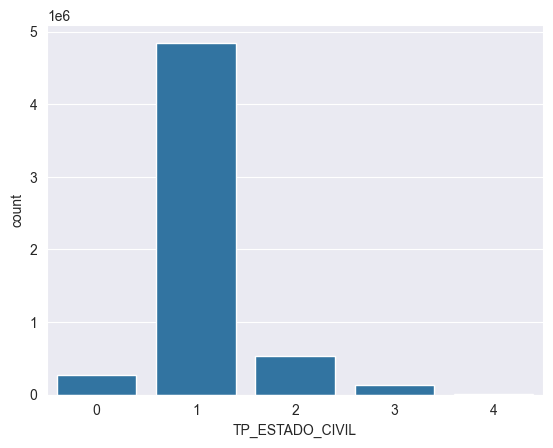

In [29]:
# Gráfico de contagem do estado civil dos canditados:

sns.countplot(data=df_enem, x='TP_ESTADO_CIVIL')

In [30]:
# Realizando a contagem dos números da coluna do raça:

df_enem['TP_COR_RACA'].value_counts().sort_index()

TP_COR_RACA
0     116883
1    2007633
2     771740
3    2720485
4     128522
5      37846
Name: count, dtype: int64

<Axes: xlabel='TP_COR_RACA', ylabel='count'>

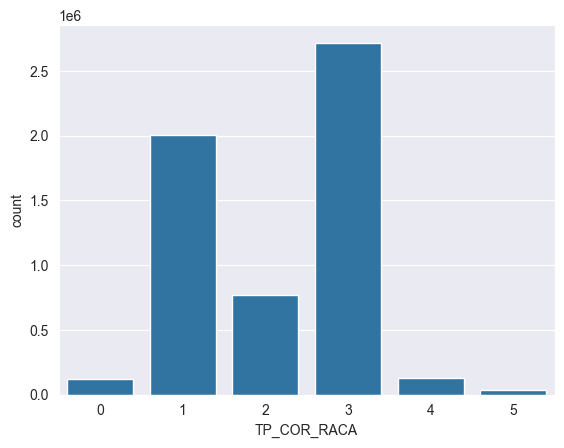

In [31]:
# Gráfico de contagem da raça dos canditados:

sns.countplot(data=df_enem, x='TP_COR_RACA')

In [32]:
# Realizando a contagem dos números da coluna do estados:

ufs = df_enem['SG_UF_PROVA'].value_counts()
ufs

SG_UF_PROVA
SP    910492
MG    577211
BA    447691
RJ    387480
PA    330883
CE    325680
PE    315569
RS    249130
PR    239635
MA    238272
GO    211069
PB    164965
AM    163426
PI    134678
RN    131225
SC    121153
DF    116932
ES    105812
AL    102551
MT    101727
SE     88205
MS     84548
RO     69594
TO     59209
AP     47263
AC     41824
RR     16885
Name: count, dtype: int64

In [33]:
# Criando um DataFrame dos estados separados:

df_ufs = pd.DataFrame({'uf': ufs.index, 'candidatos': ufs.values})
df_ufs.head()

,uf,candidatos
0,SP,910492
1,MG,577211
2,BA,447691
3,RJ,387480
4,PA,330883


In [34]:
##### ANÁLISE DAS QUESTÕES #####

# Realizando a contagem da resposta da primeira pergunta:

df_enem['Q001'].value_counts().sort_index()

Q001
A     336216
B    1324198
C     839009
D     615284
E    1444832
F     382851
G     239720
H     505033
Name: count, dtype: int64

In [35]:
# Avaliando o impacto nos dados daqueles que responderam que não sabe sobre o pai:

len(df_enem.loc[df_enem['Q001'] == 'H']) / df_enem.shape[0]

0.08732897823644686

In [36]:
# Realizando a contagem da resposta da segunda pergunta:

df_enem['Q002'].value_counts().sort_index()

Q002
A     239085
B    1044422
C     788103
D     697557
E    1796085
F     532008
G     434437
H     155446
Name: count, dtype: int64

In [37]:
# Avaliando o impacto nos dados daqueles que responderam que não sabe sobre a mãe:

len(df_enem.loc[df_enem['Q002'] == 'H']) / df_enem.shape[0]

0.0268793135318736

In [38]:
# Criando novas variáveis para delimitar pais que possuem nível superior:

df_enem['pai_possui_superior'] = df_enem['Q001'].isin(['F', 'G'])
df_enem['mae_possui_superior'] = df_enem['Q002'].isin(['F', 'G'])
df_enem.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,pai_possui_superior,mae_possui_superior
0,11,F,1,2,1,1,11,1,NaN,0,None,NaN,NaN,NaN,PA,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,False,False
1,11,M,2,3,1,1,11,1,NaN,0,None,NaN,NaN,NaN,RN,1,1,1,1,604.10,661.70,595.30,711.30,1,1.00,120.00,120.00,120.00,120.00,100.00,580.00,None,None,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,False,False
2,4,F,2,3,2,2,0,2,1.00,0,BA,2.00,1.00,1.00,BA,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,A,D,3.00,B,A,B,A,A,A,B,A,B,A,B,A,A,B,A,A,A,A,A,A,False,False
3,2,M,1,3,1,2,0,2,1.00,0,SP,3.00,1.00,1.00,SP,1,1,1,1,620.80,675.00,624.20,759.40,0,1.00,140.00,200.00,140.00,120.00,160.00,760.00,None,None,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,False,False
4,4,F,1,3,2,1,1,1,NaN,0,None,NaN,NaN,NaN,MG,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,G,B,B,3.00,B,A,B,D,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B,False,True


In [39]:
# Até que série seu pai, ou o homem responsável por você, estudou? PORCENTAGEM

df_enem['pai_possui_superior'].value_counts(normalize=True) * 100

pai_possui_superior
False   89.23
True    10.77
Name: proportion, dtype: float64

<Axes: xlabel='pai_possui_superior', ylabel='count'>

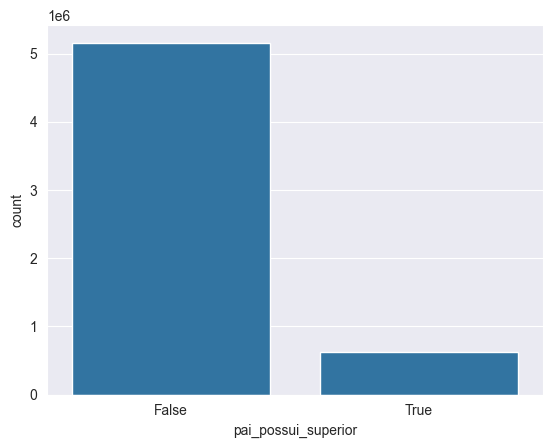

In [40]:
# Até que série seu pai, ou o homem responsável por você, estudou?

sns.countplot(data=df_enem, x='pai_possui_superior')

In [41]:
# Até que série sua mãe, ou a mulher responsável por você, estudou? PORCENTAGEM

df_enem['mae_possui_superior'].value_counts(normalize=True) * 100

mae_possui_superior
False   83.29
True    16.71
Name: proportion, dtype: float64

<Axes: xlabel='mae_possui_superior', ylabel='count'>

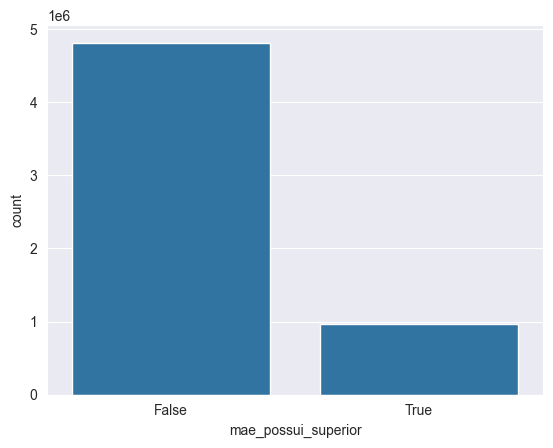

In [42]:
# Até que série sua mãe, ou a mulher responsável por você, estudou?

sns.countplot(data=df_enem, x='mae_possui_superior')

In [43]:
# Transformando Q006 letras em números:

dicionario_renda = dict()

for i, letra in enumerate(ascii_uppercase):
    if i == 17:
        break
    dicionario_renda[letra] = i
    
dicionario_renda

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16}

In [44]:
# Adicionando no Dataframe uma coluna com os números derivada da Q006:

df_enem['renda_familiar'] = df_enem['Q006'].map(dicionario_renda)

df_enem.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,pai_possui_superior,mae_possui_superior,renda_familiar
0,11,F,1,2,1,1,11,1,NaN,0,None,NaN,NaN,NaN,PA,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,False,False,NaN
1,11,M,2,3,1,1,11,1,NaN,0,None,NaN,NaN,NaN,RN,1,1,1,1,604.10,661.70,595.30,711.30,1,1.00,120.00,120.00,120.00,120.00,100.00,580.00,None,None,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,False,False,NaN
2,4,F,2,3,2,2,0,2,1.00,0,BA,2.00,1.00,1.00,BA,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,A,D,3.00,B,A,B,A,A,A,B,A,B,A,B,A,A,B,A,A,A,A,A,A,False,False,1.00
3,2,M,1,3,1,2,0,2,1.00,0,SP,3.00,1.00,1.00,SP,1,1,1,1,620.80,675.00,624.20,759.40,0,1.00,140.00,200.00,140.00,120.00,160.00,760.00,None,None,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,False,False,NaN
4,4,F,1,3,2,1,1,1,NaN,0,None,NaN,NaN,NaN,MG,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,G,B,B,3.00,B,A,B,D,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B,False,True,1.00


<Axes: xlabel='renda_familiar', ylabel='count'>

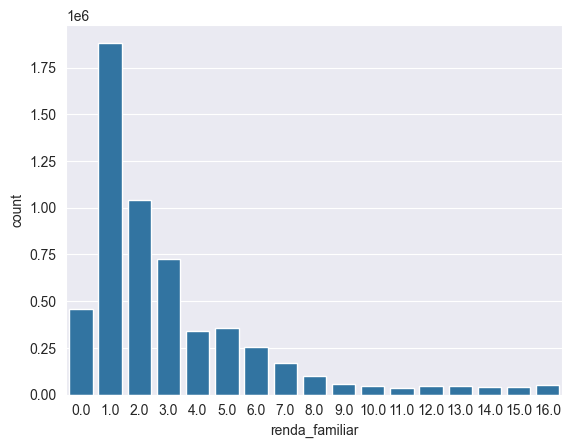

In [45]:
# Analisando a renda familiar dos candidatos:

sns.countplot(data=df_enem, x='renda_familiar')

In [46]:
### RELACIONANDO NOTAS COM AS CARACTERÍSTICAS DOS CANDIDATOS

# Criando um Dataframe com a relação nota|sexo:

df_sexo = df_enem.loc[:, coluna_notas + ['TP_SEXO']]
df_sexo.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_SEXO
0,NaN,NaN,NaN,NaN,NaN,F
1,604.10,661.70,595.30,711.30,580.00,M
2,NaN,NaN,NaN,NaN,NaN,F
3,620.80,675.00,624.20,759.40,760.00,M
4,NaN,NaN,NaN,NaN,NaN,F


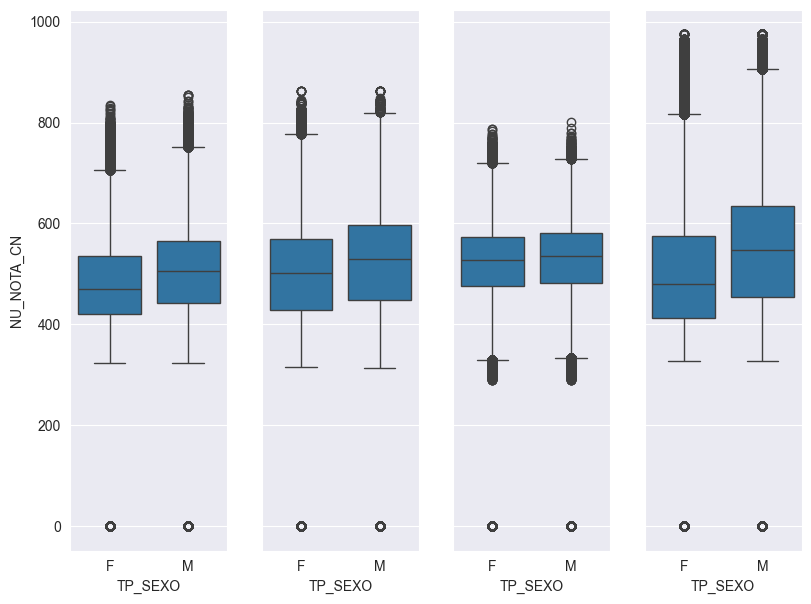

In [47]:
# Gráfico da relação nota|sexo:

sns.set_style("darkgrid")
figura, graficos = plt.subplots(1, 4, sharey=True, figsize=(8,6))
plt.tight_layout()

for i in range(4):
    coluna_1 = coluna_notas[i] # 1 a 4
    sns.boxplot(data=df_sexo, y=coluna_1, x='TP_SEXO', ax=graficos[i])

In [48]:
# Criando um Dataframe com a relação nota|raça:

df_raca = df_enem.loc[:, coluna_notas + ['TP_COR_RACA']]
df_raca.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_COR_RACA
0,NaN,NaN,NaN,NaN,NaN,2
1,604.10,661.70,595.30,711.30,580.00,3
2,NaN,NaN,NaN,NaN,NaN,3
3,620.80,675.00,624.20,759.40,760.00,3
4,NaN,NaN,NaN,NaN,NaN,3


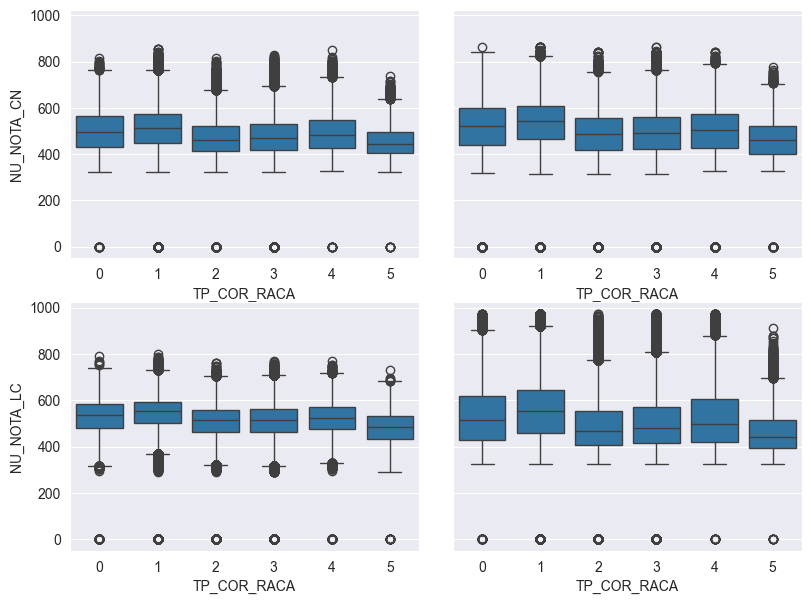

In [49]:
# Gráfico da relação nota|raça:

sns.set_style("darkgrid")
figura, graficos = plt.subplots(2, 2, sharey=True, figsize=(8,6))
plt.tight_layout()

for i in range(2):
    coluna_1 = coluna_notas[i*2] #1 e 2
    coluna_2 = coluna_notas[i*2+1] # 3 e 4
    sns.boxplot(data=df_raca, y=coluna_1, x='TP_COR_RACA', ax=graficos[i][0])
    sns.boxplot(data=df_raca, y=coluna_2, x='TP_COR_RACA', ax=graficos[i][1])

In [50]:
# Criando um Dataframe com a relação nota|instruções pais:

df_instrucao_pais = df_enem.loc[:, coluna_notas + ['pai_possui_superior', 'mae_possui_superior']]
df_instrucao_pais.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,pai_possui_superior,mae_possui_superior
0,NaN,NaN,NaN,NaN,NaN,False,False
1,604.10,661.70,595.30,711.30,580.00,False,False
2,NaN,NaN,NaN,NaN,NaN,False,False
3,620.80,675.00,624.20,759.40,760.00,False,False
4,NaN,NaN,NaN,NaN,NaN,False,True


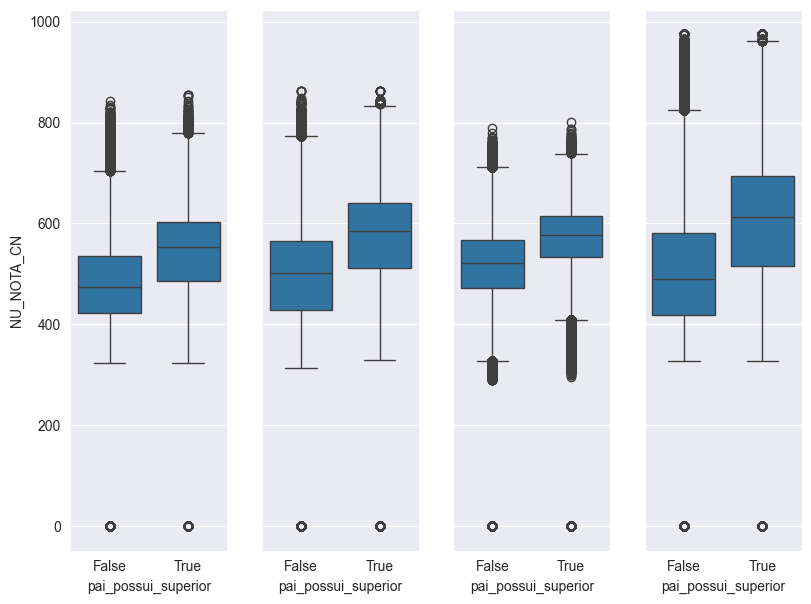

In [51]:
# Gráfico da relação nota|instruções pai:

sns.set_style("darkgrid")
figura, graficos = plt.subplots(1, 4, sharey=True, figsize=(8,6))
plt.tight_layout()

for i in range(4):
    coluna_1 = coluna_notas[i] # 1 a 4
    sns.boxplot(data=df_instrucao_pais, y=coluna_1, x='pai_possui_superior', ax=graficos[i])

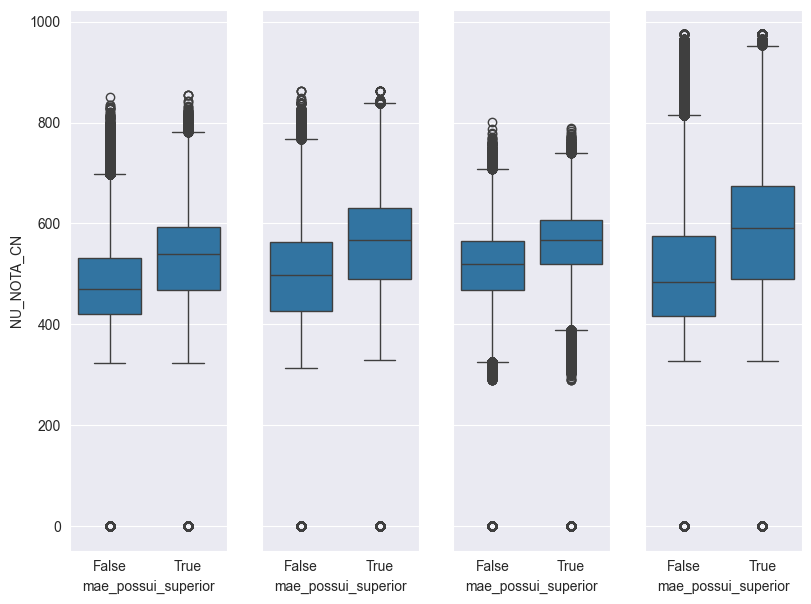

In [52]:
# Gráfico da relação nota|instruções mãe:

sns.set_style("darkgrid")
figura, graficos = plt.subplots(1, 4, sharey=True, figsize=(8,6))
plt.tight_layout()

for i in range(4):
    coluna_1 = coluna_notas[i] # 1 a 4
    sns.boxplot(data=df_instrucao_pais, y=coluna_1, x='mae_possui_superior', ax=graficos[i])

In [53]:
# Criando um Dataframe com a relação nota|faixa etária:

df_idade = df_enem.loc[:, coluna_notas + ['TP_FAIXA_ETARIA']]
df_idade.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_FAIXA_ETARIA
0,NaN,NaN,NaN,NaN,NaN,11
1,604.10,661.70,595.30,711.30,580.00,11
2,NaN,NaN,NaN,NaN,NaN,4
3,620.80,675.00,624.20,759.40,760.00,2
4,NaN,NaN,NaN,NaN,NaN,4


<Axes: >

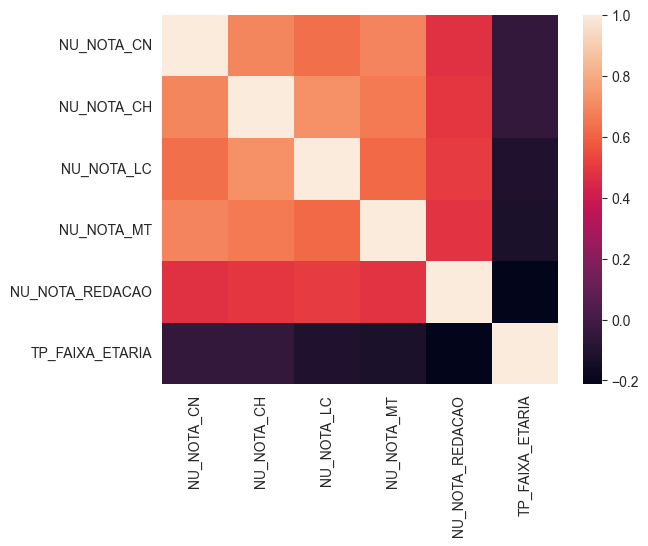

In [54]:
# Gráfico da relação nota|faixa etária:

correlacoes_idade = df_idade.corr()
sns.heatmap(correlacoes_idade)

In [55]:
# Criando um Dataframe com a relação nota|renda familiar:

df_renda = df_enem.loc[:, coluna_notas + ['renda_familiar']]
df_renda.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,renda_familiar
0,NaN,NaN,NaN,NaN,NaN,NaN
1,604.10,661.70,595.30,711.30,580.00,NaN
2,NaN,NaN,NaN,NaN,NaN,1.00
3,620.80,675.00,624.20,759.40,760.00,NaN
4,NaN,NaN,NaN,NaN,NaN,1.00


<Axes: >

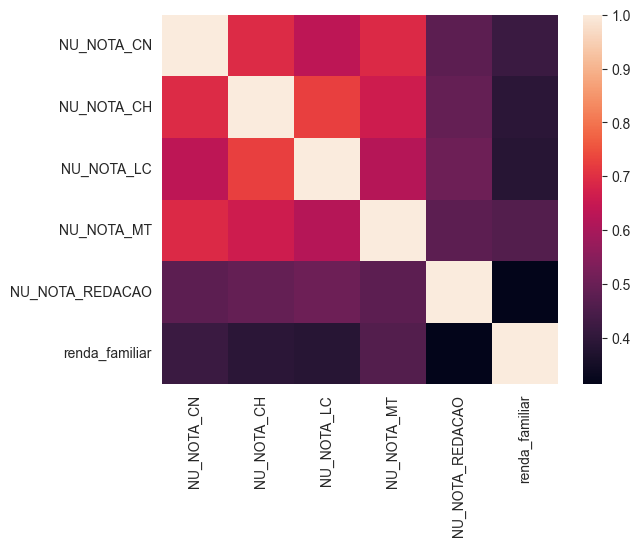

In [56]:
# Gráfico da relação nota|renda familiar:

correlacoes_renda = df_renda.corr()
sns.heatmap(correlacoes_renda)